In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.svm import SVC

In [2]:
# Importing the dataset
dataset = pd.read_csv("malware.csv.csv", sep = '|')

In [3]:
X = dataset.drop(['Name', 'md5', 'legitimate'], axis = 1).values  #drop
y = dataset['legitimate'].values                                  #assigning target variable 
                                                                     #(0 for legitimate, 1 for not)

In [27]:
# Assuming 'dataset' is your DataFrame
feature_names = dataset.columns

# Print all feature names
print("List of all features:")
for feature in feature_names:
    print(feature)


List of all features:
Name
md5
Machine
SizeOfOptionalHeader
Characteristics
MajorLinkerVersion
MinorLinkerVersion
SizeOfCode
SizeOfInitializedData
SizeOfUninitializedData
AddressOfEntryPoint
BaseOfCode
BaseOfData
ImageBase
SectionAlignment
FileAlignment
MajorOperatingSystemVersion
MinorOperatingSystemVersion
MajorImageVersion
MinorImageVersion
MajorSubsystemVersion
MinorSubsystemVersion
SizeOfImage
SizeOfHeaders
CheckSum
Subsystem
DllCharacteristics
SizeOfStackReserve
SizeOfStackCommit
SizeOfHeapReserve
SizeOfHeapCommit
LoaderFlags
NumberOfRvaAndSizes
SectionsNb
SectionsMeanEntropy
SectionsMinEntropy
SectionsMaxEntropy
SectionsMeanRawsize
SectionsMinRawsize
SectionMaxRawsize
SectionsMeanVirtualsize
SectionsMinVirtualsize
SectionMaxVirtualsize
ImportsNbDLL
ImportsNb
ImportsNbOrdinal
ExportNb
ResourcesNb
ResourcesMeanEntropy
ResourcesMinEntropy
ResourcesMaxEntropy
ResourcesMeanSize
ResourcesMinSize
ResourcesMaxSize
LoadConfigurationSize
VersionInformationSize
legitimate


57

In [5]:
# Number of attributes (features) before dropping columns
num_attributes_before = dataset.shape[1]

# Drop the specified columns
X = dataset.drop(['Name', 'md5', 'legitimate'], axis=1).values

# Number of attributes (features) after dropping columns
num_attributes_after = X.shape[1]

print(f"Number of attributes before dropping columns: {num_attributes_before}")
print(f"Number of attributes after dropping columns: {num_attributes_after}")


Number of attributes before dropping columns: 57
Number of attributes after dropping columns: 54


In [6]:
# Assuming 'dataset' is your DataFrame
feature_names = dataset.drop(['Name', 'md5', 'legitimate'], axis=1).columns

print("List of all features is:")
for feature in feature_names:
    print(feature)


List of all features is:
Machine
SizeOfOptionalHeader
Characteristics
MajorLinkerVersion
MinorLinkerVersion
SizeOfCode
SizeOfInitializedData
SizeOfUninitializedData
AddressOfEntryPoint
BaseOfCode
BaseOfData
ImageBase
SectionAlignment
FileAlignment
MajorOperatingSystemVersion
MinorOperatingSystemVersion
MajorImageVersion
MinorImageVersion
MajorSubsystemVersion
MinorSubsystemVersion
SizeOfImage
SizeOfHeaders
CheckSum
Subsystem
DllCharacteristics
SizeOfStackReserve
SizeOfStackCommit
SizeOfHeapReserve
SizeOfHeapCommit
LoaderFlags
NumberOfRvaAndSizes
SectionsNb
SectionsMeanEntropy
SectionsMinEntropy
SectionsMaxEntropy
SectionsMeanRawsize
SectionsMinRawsize
SectionMaxRawsize
SectionsMeanVirtualsize
SectionsMinVirtualsize
SectionMaxVirtualsize
ImportsNbDLL
ImportsNb
ImportsNbOrdinal
ExportNb
ResourcesNb
ResourcesMeanEntropy
ResourcesMinEntropy
ResourcesMaxEntropy
ResourcesMeanSize
ResourcesMinSize
ResourcesMaxSize
LoadConfigurationSize
VersionInformationSize


In [7]:
# Split the dataset into training and testing sets
test_size_percentage = 20  # You can adjust this percentage as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_percentage / 100, random_state=42)

# Calculate the number of samples in each split
num_samples_total = len(dataset)
num_samples_train = len(X_train)
num_samples_test = len(X_test)

# Print the percentages of splitting
print(f"Percentage of data split for training: {(num_samples_train / num_samples_total) * 100:.2f}%")   #2f is a format specifier that specifies 
                                                                                                        #how to format the floating-point number.
                                                                                                        #says to format the number #with two decimal places.
print(f"Percentage of data split for testing: {(num_samples_test / num_samples_total) * 100:.2f}%")

Percentage of data split for training: 80.00%
Percentage of data split for testing: 20.00%


In [8]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [9]:
# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {accuracy:.2f}")

Accuracy of Random Forest: 0.98


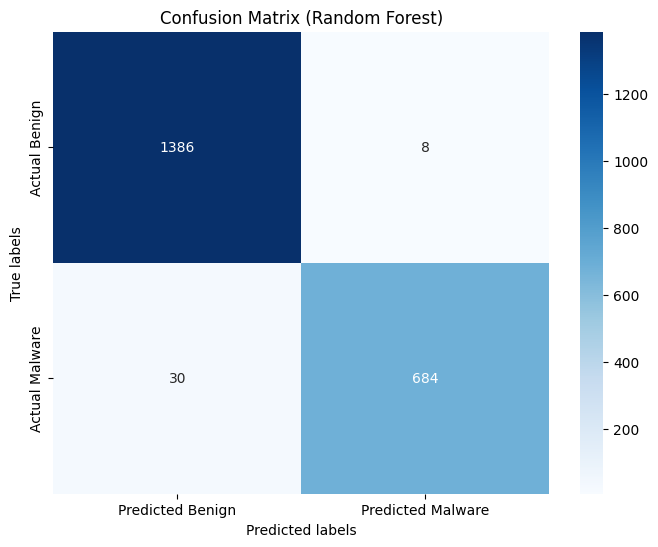

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
random_forest_classifier = RandomForestClassifier()

# Train Random Forest classifier on the training data
random_forest_classifier.fit(X_train, y_train)

# Generate a confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, random_forest_classifier.predict(X_test))

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Benign', 'Predicted Malware'], yticklabels=['Actual Benign', 'Actual Malware'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


In [11]:
from sklearn.svm import SVC  # Importing the Support Vector Classification (SVC) class

# Create a Support Vector Machine (SVM) classifier with an RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming you have loaded your dataset into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier with an RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)


In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {accuracy:.2f}")

Accuracy of SVM: 0.96


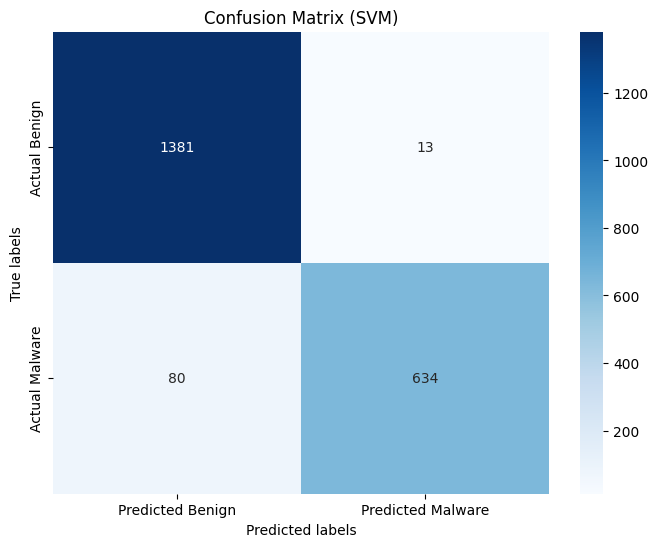

In [14]:
# Generate a confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_classifier.predict(X_test))

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Benign', 'Predicted Malware'], yticklabels=['Actual Benign', 'Actual Malware'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (SVM)')
plt.show()


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train Decision Tree classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

# Predict labels for testing data
y_pred = decision_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.9748576850094877


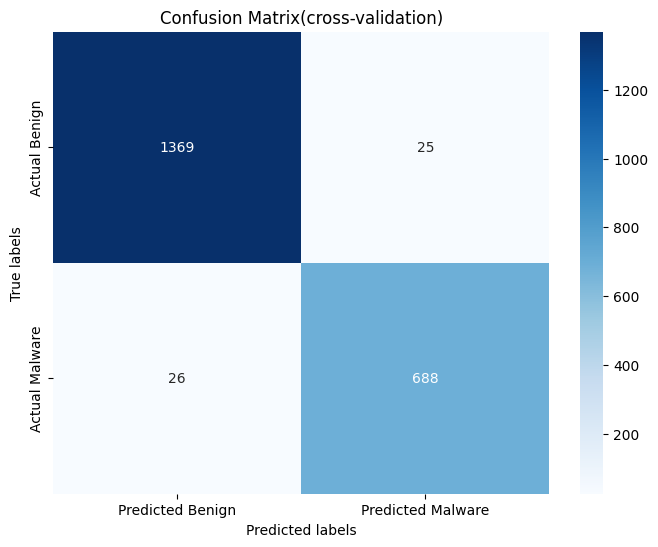

In [16]:
decision_tree_classifier = DecisionTreeClassifier()

# Train Decision Tree classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

# Predict labels for testing data
y_pred = decision_tree_classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Benign', 'Predicted Malware'], yticklabels=['Actual Benign', 'Actual Malware'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix(cross-validation)')
plt.show()



In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
random_forest_classifier = RandomForestClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.98221695 0.98339265 0.97568209 0.97924081 0.97864769]
Mean Accuracy: 0.9798360359486156


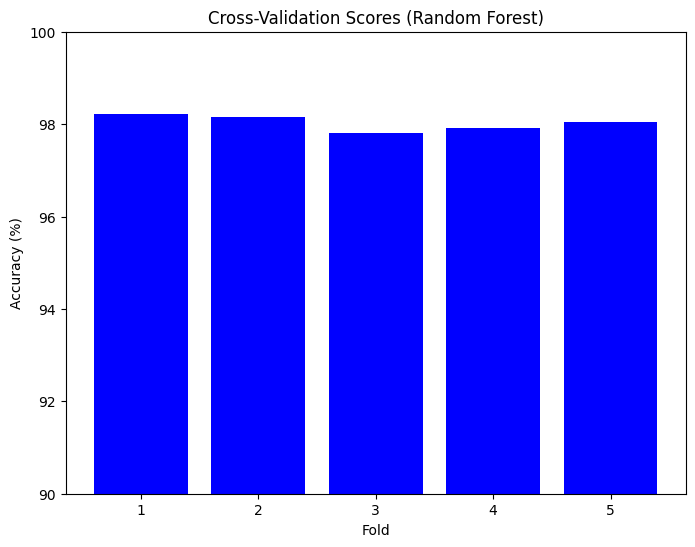

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
random_forest_classifier = RandomForestClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(random_forest_classifier, X_train, y_train, cv=5)

# Multiply accuracy scores by 100 to convert them to percentages
cv_scores_percent = cv_scores * 100

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores_percent)+1), cv_scores_percent, color='blue')
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Scores (Random Forest)')
plt.ylim(90, 100)  # Set y-axis limits to ensure consistency
plt.show()


In [20]:
# Create Voting Classifier with Random Forest
voting_classifier_rf = VotingClassifier(
    estimators=[
        ('random_forest', random_forest_classifier)
    ],
    voting='hard'  # Use 'hard' voting for majority rule voting
)

# Train Voting Classifier on the training data
voting_classifier_rf.fit(X_train, y_train)

# Evaluate Voting Classifier on the testing data
accuracy_voting_rf = voting_classifier_rf.score(X_test, y_test)
print("Accuracy (Voting Classifier with Random Forest):", accuracy_voting_rf)


Accuracy (Voting Classifier with Random Forest): 0.9814990512333965


In [21]:
from sklearn.ensemble import VotingClassifier

# Create Voting Classifier with SVM
voting_classifier_svm = VotingClassifier(
    estimators=[
        ('svm', svm_classifier)
    ],
    voting='hard'  # Use 'hard' voting for majority rule voting
)

# Train Voting Classifier on the training data
voting_classifier_svm.fit(X_train, y_train)

# Evaluate Voting Classifier on the testing data
accuracy_voting_svm = voting_classifier_svm.score(X_test, y_test)
print("Accuracy (Voting Classifier with SVM):", accuracy_voting_svm)


Accuracy (Voting Classifier with SVM): 0.9558823529411765


In [22]:
# Create Voting Classifier with Decision Tree
voting_classifier_dt = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree_classifier)
    ],
    voting='hard'  # Use 'hard' voting for majority rule voting
)

# Train Voting Classifier on the training data
voting_classifier_dt.fit(X_train, y_train)

# Evaluate Voting Classifier on the testing data
accuracy_voting_dt = voting_classifier_dt.score(X_test, y_test)
print("Accuracy (Voting Classifier with Decision Tree):", accuracy_voting_dt)


Accuracy (Voting Classifier with Decision Tree): 0.9748576850094877


In [23]:
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
rf_grid_search = GridSearchCV(random_forest_classifier, rf_param_grid, cv=2)
rf_grid_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_
rf_accuracy = rf_best_model.score(X_test, y_test)
print("Accuracy (Random Forest with best parameters):", rf_accuracy)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy (Random Forest with best parameters): 0.9829222011385199


In [26]:
import pickle
with open('rf_best_model.pkl', 'wb') as f:
    pickle.dump(rf_best_model, f)